# COVID19 model

In [1]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("C:/git/case7-lockdown-exit-strategy/")

from covid.models.examples.covid import COVID19
from covid.models.examples.covid_category import COVID19Category

# COVID model

![](../references/model1.png)

## COVID19 model without age categories

In [15]:
N = 67e6
beta = 3.3/4

model1 = COVID19(N = N,beta = 5/4)

[INFO] Displaying only the largest graph component, graphs may be repeated for each category


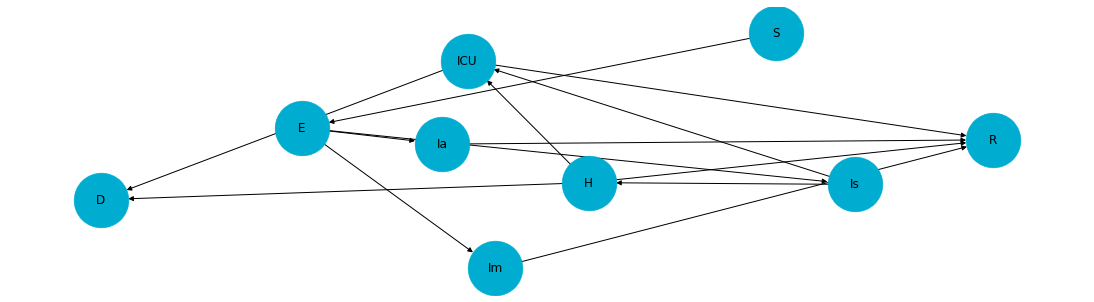

In [16]:
model1.show_network(k = 2)

In [17]:
exposed = 1
init_state1 = {"S":N - exposed,"E":exposed}
states = model1.solve(init_state1,n_days = 200)

In [18]:
states.show()

## COVID19 model with age categories

In [34]:
N = 67e6
categories = ["children","young","active","fragile","senior"]

model = COVID19Category(
    N = [N/len(categories)]*len(categories),
    beta = [1/4,4/4,5/4,5/4,5/4],
    incubation_rate = 1/5.2,
    recovery_rate_asymptomatic = 1/5,
    recovery_rate_mild = 1/6,
    hospitalization_rate = 1/3,
    proba_mild = [0.05,0.1,0.2,0.3,0.4],
    proba_severe = [0.01,0.02,0.05,0.2,0.3],
    proba_icu = [0.01,0.02,0.05,0.2,0.3],
    proba_death_icu = [0.01,0.02,0.05,0.2,0.3],
    proba_death_hospital = [0.01,0.02,0.05,0.2,0.3],
    hospital_exit_rate = 1/5,
    categories = categories,
    contact = {"category": np.array([[0.3,0.2,0.2,0.2,0.1],[0.2,0.3,0.2,0.2,0.1],[0.2,0.2,0.3,0.2,0.1],[0.2,0.2,0.2,0.3,0.1],[0.1,0.1,0.1,0.1,0.6]])}
)

In [35]:
model.params

N  beta  incubation_rate  recovery_rate_asymptomatic  \
category                                                                  
children  13400000.0  0.25         0.192308                         0.2   
young     13400000.0  1.00         0.192308                         0.2   
active    13400000.0  1.25         0.192308                         0.2   
fragile   13400000.0  1.25         0.192308                         0.2   
senior    13400000.0  1.25         0.192308                         0.2   

          recovery_rate_mild  hospitalization_rate  proba_mild  proba_severe  \
category                                                                       
children            0.166667              0.333333        0.05          0.01   
young               0.166667              0.333333        0.10          0.02   
active              0.166667              0.333333        0.20          0.05   
fragile             0.166667              0.333333        0.30          0.20   
senior              0.166667              0.333333        0.40          0.30   

          proba_icu  proba_death_icu  proba_death_hospital  hospital_exit_rate  
category                                                                        
children       0.01             0.01                  0.01                 0.2  
young          0.02             0.02                  0.02                 0.2  
active         0.05             0.05                  0.05                 0.2  
fragile        0.20             0.20                  0.20                 0.2  
senior         0.30             0.30                  0.30                 0.2

[INFO] Displaying only the largest graph component, graphs may be repeated for each category


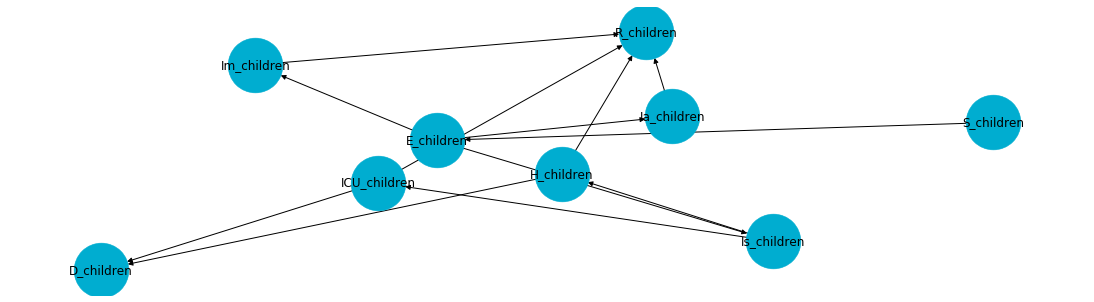

In [36]:
model.show_network(k = 1)

In [37]:
exposed = 1
init_state = model.make_init_state("S",("E_young",1))
init_state

{'S_children': 13400000.0,
 'S_young': 13399999.0,
 'S_active': 13400000.0,
 'S_fragile': 13400000.0,
 'S_senior': 13400000.0,
 'E_young': 1}

In [38]:
states = model.solve(init_state,100)

In [39]:
states.head()

S_children       S_young      S_active     S_fragile      S_senior  \
0  1.340000e+07  1.340000e+07  1.340000e+07  1.340000e+07  1.340000e+07   
1  1.340000e+07  1.340000e+07  1.340000e+07  1.340000e+07  1.340000e+07   
2  1.340000e+07  1.340000e+07  1.340000e+07  1.340000e+07  1.340000e+07   
3  1.340000e+07  1.340000e+07  1.340000e+07  1.340000e+07  1.340000e+07   
4  1.340000e+07  1.340000e+07  1.340000e+07  1.340000e+07  1.340000e+07   

   E_children   E_young  E_active  E_fragile  E_senior  ...    D_children  \
0    0.000000  1.000000  0.000000   0.000000  0.000000  ...  0.000000e+00   
1    0.004017  0.849069  0.020118   0.020118  0.010149  ...  8.568192e-11   
2    0.013831  0.762525  0.069586   0.069582  0.036004  ...  2.310539e-09   
3    0.027572  0.721996  0.139707   0.139686  0.075150  ...  1.492947e-08   
4    0.044645  0.717458  0.228263   0.228190  0.128901  ...  5.406121e-08   

        D_young      D_active     D_fragile      D_senior  R_children  \
0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00    0.000000   
1  7.159646e-07  1.071516e-08  1.714423e-07  1.933693e-07    0.000013   
2  4.839412e-06  2.893402e-07  4.629402e-06  5.261018e-06    0.000182   
3  1.391990e-05  1.873701e-06  2.997833e-05  3.449087e-05    0.000813   
4  2.836869e-05  6.805351e-06  1.088783e-04  1.273872e-04    0.002295   

    R_young  R_active  R_fragile  R_senior  
0  0.000000  0.000000   0.000000  0.000000  
1  0.016399  0.000061   0.000051  0.000022  
2  0.058707  0.000857   0.000717  0.000312  
3  0.119464  0.003854   0.003253  0.001449  
4  0.194070  0.010959   0.009330  0.004273  

[5 rows x 45 columns]

>> Category children


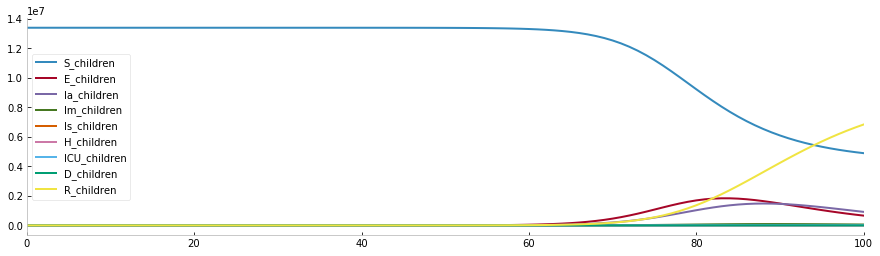

>> Category young


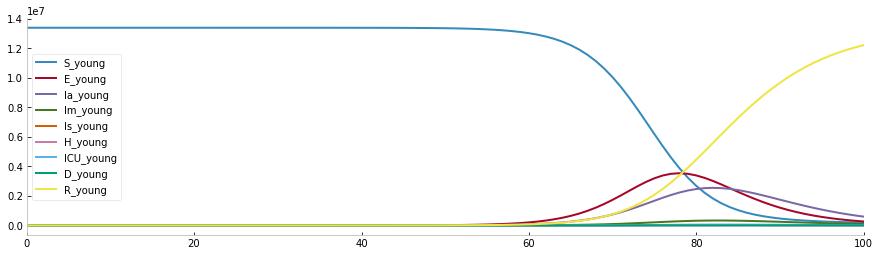

>> Category active


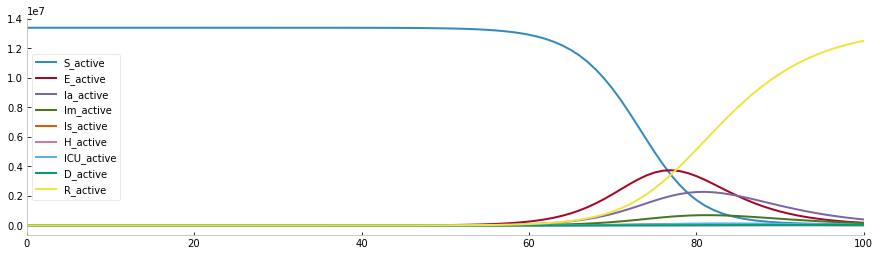

>> Category fragile


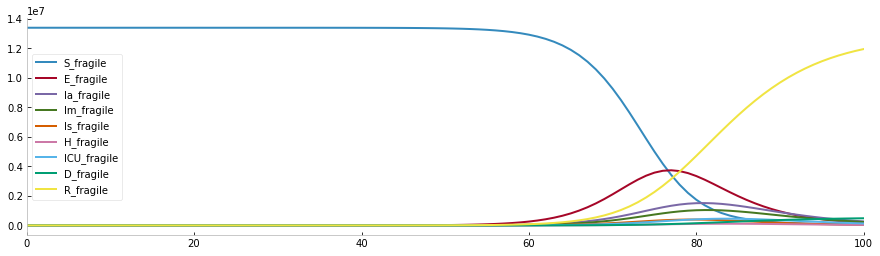

>> Category senior


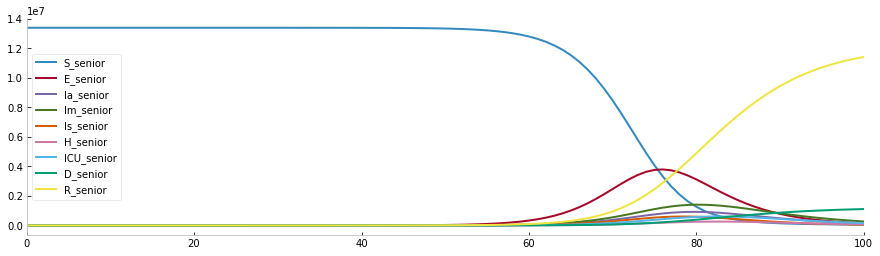

In [40]:
for cat in model.dimensions["category"]:
    print(f">> Category {cat}")
    states[cat].show(plotly = False)

# Model without categories at France level

## Getting epidemiology data

In [152]:
from covid.dataset import fetch_daily_case

In [153]:
cases = fetch_daily_case(return_data=True)
cases.head()

date  granularite maille_code         maille_nom  cas_confirmes  \
0  2020-01-24  departement      DEP-16           Charente            0.0   
1  2020-01-24  departement      DEP-17  Charente-Maritime            0.0   
2  2020-01-24  departement      DEP-19            Corrèze            0.0   
3  2020-01-24  departement      DEP-23             Creuse            0.0   
4  2020-01-24  departement      DEP-24           Dordogne            0.0   

   cas_ehpad  cas_confirmes_ehpad  cas_possibles_ehpad  deces  deces_ehpad  \
0        NaN                  NaN                  NaN    NaN          NaN   
1        NaN                  NaN                  NaN    NaN          NaN   
2        NaN                  NaN                  NaN    NaN          NaN   
3        NaN                  NaN                  NaN    NaN          NaN   
4        NaN                  NaN                  NaN    NaN          NaN   

   reanimation  hospitalises  gueris  depistes              source_nom  \
0          NaN           NaN     NaN       NaN  ARS Nouvelle-Aquitaine   
1          NaN           NaN     NaN       NaN  ARS Nouvelle-Aquitaine   
2          NaN           NaN     NaN       NaN  ARS Nouvelle-Aquitaine   
3          NaN           NaN     NaN       NaN  ARS Nouvelle-Aquitaine   
4          NaN           NaN     NaN       NaN  ARS Nouvelle-Aquitaine   

                                          source_url source_archive  \
0  https://www.nouvelle-aquitaine.ars.sante.fr/co...            NaN   
1  https://www.nouvelle-aquitaine.ars.sante.fr/co...            NaN   
2  https://www.nouvelle-aquitaine.ars.sante.fr/co...            NaN   
3  https://www.nouvelle-aquitaine.ars.sante.fr/co...            NaN   
4  https://www.nouvelle-aquitaine.ars.sante.fr/co...            NaN   

                source_type  
0  agences-regionales-sante  
1  agences-regionales-sante  
2  agences-regionales-sante  
3  agences-regionales-sante  
4  agences-regionales-sante

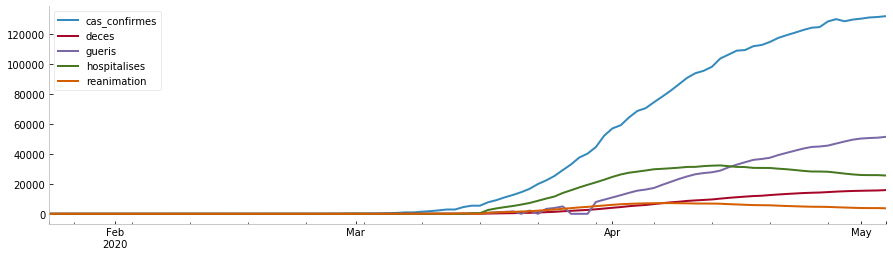

In [14]:
cases_fr = (
    cases.query("granularite =='pays'")
    .query("source_nom=='Ministère des Solidarités et de la Santé'")
    [["date","cas_confirmes","deces","gueris","hospitalises","reanimation"]]
    .drop_duplicates(subset = ["date"])
    .fillna(0.0)
    .assign(date = lambda x : pd.to_datetime(x["date"]))
    .set_index("date")
)

start,end = cases_fr.index[0],cases_fr.index[-1]
date_range = pd.date_range(start,end,freq="D")
cases_fr = cases_fr.reindex(date_range).fillna(method="ffill")

cases_fr.plot(figsize = (15,4))
plt.show()

In [15]:
from covid.utils import clean_series

cases_fr["Is"] = clean_series(cases_fr["cas_confirmes"] - (cases_fr["deces"] + cases_fr["gueris"]))
cases_fr["D"] = clean_series(cases_fr["deces"])
cases_fr["R"] = clean_series(cases_fr["gueris"])
cases_fr["H"] = clean_series(cases_fr["hospitalises"])
cases_fr["ICU"] = clean_series(cases_fr["reanimation"])

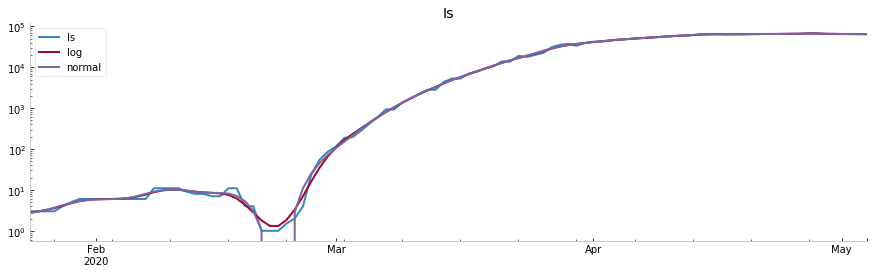

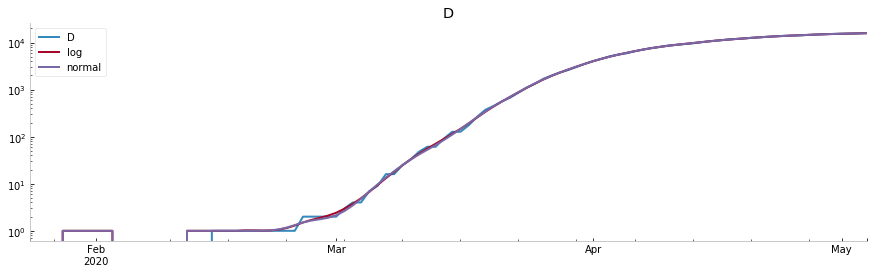

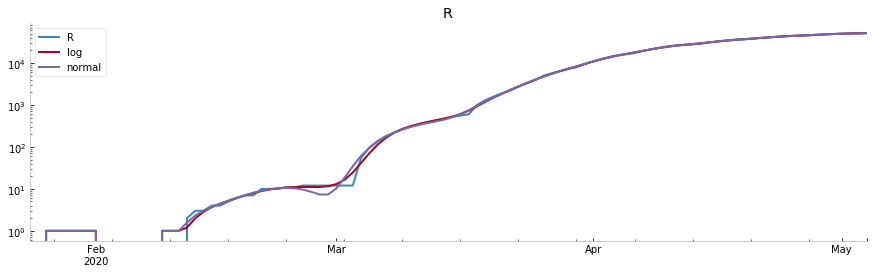

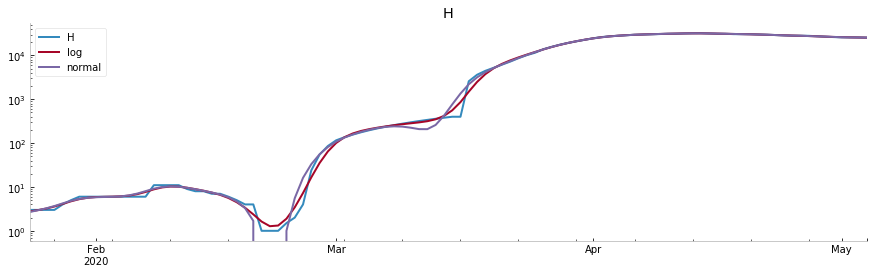

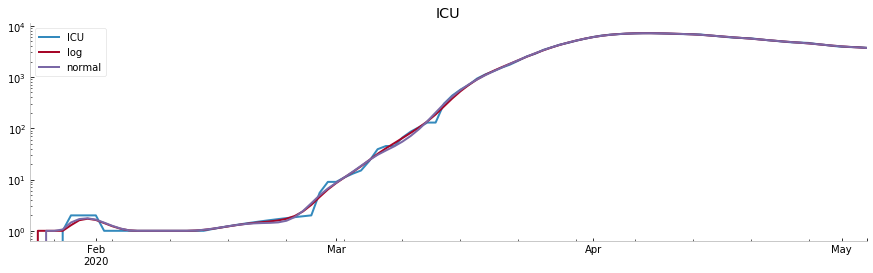

In [16]:
for col in ["Is","D","R","H","ICU"]:
    cases_fr[col].plot(figsize = (15,4),logy = True,title = col)
    clean_series(cases_fr[col],logsmooth = True).plot(label = "log")
    clean_series(cases_fr[col],smooth = True).plot(label = "normal")
    plt.legend()
    plt.show()

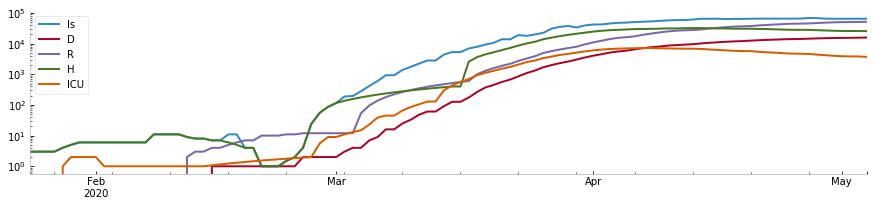

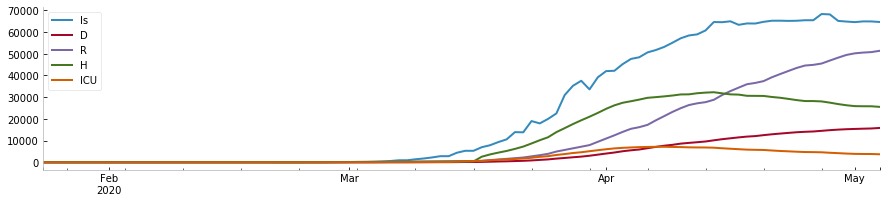

In [17]:
cases_fr[["Is","D","R","H","ICU"]].plot(figsize = (15,3),logy = True);
cases_fr[["Is","D","R","H","ICU"]].plot(figsize = (15,3),logy = False);

In [18]:
clean_series(cases_fr["hospitalises"],smooth = False).loc["2020-02"]

2020-02-01     6.0
2020-02-02     6.0
2020-02-03     6.0
2020-02-04     6.0
2020-02-05     6.0
2020-02-06     6.0
2020-02-07     6.0
2020-02-08    11.0
2020-02-09    11.0
2020-02-10    11.0
2020-02-11    11.0
2020-02-12     9.0
2020-02-13     8.0
2020-02-14     8.0
2020-02-15     7.0
2020-02-16     7.0
2020-02-17     6.0
2020-02-18     5.0
2020-02-19     4.0
2020-02-20     4.0
2020-02-21     1.0
2020-02-22     1.0
2020-02-23     1.0
2020-02-24     1.5
2020-02-25     2.0
2020-02-26     4.0
2020-02-27    24.0
2020-02-28    55.0
2020-02-29    86.0
Freq: D, Name: hospitalises, dtype: float64

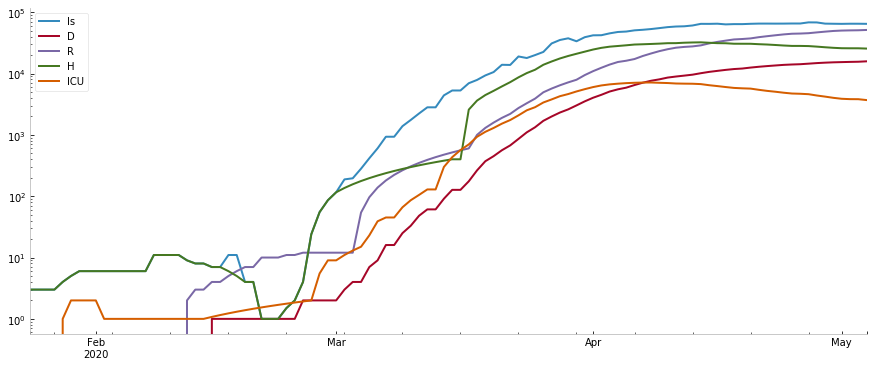

In [19]:
cases_fr[["Is","D","R","H","ICU"]].plot(figsize = (15,6),logy = True);

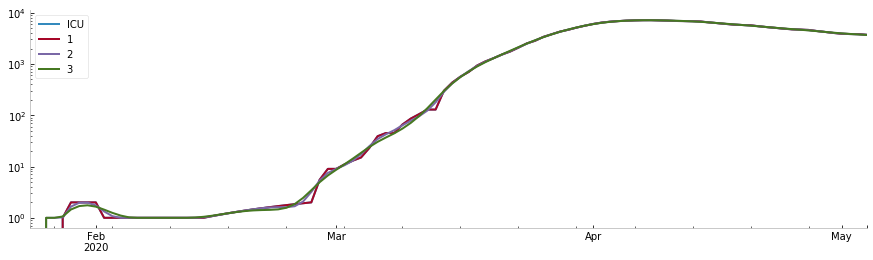

In [20]:
cases_fr["ICU"].plot(figsize = (15,4),logy = True)
clean_series(cases_fr["ICU"],smooth = False).plot(logy = True,label = "1")
clean_series(cases_fr["ICU"],smooth = True,p = 1).plot(logy = False,label = "2")
clean_series(cases_fr["ICU"],smooth = True,p = 6.25).plot(logy = False,label = "3")
plt.legend()
plt.show()

## Naive testing against national model
Warning dead cases are without considering nursing homes (EHPADs)

##### Make model

In [21]:
N = 67e6
beta = 3.3/4

national_model = COVID19(N = N,beta = beta)

##### Solve equations

In [22]:
# Start date
start_date = cases_fr.index[0]
print(start_date)

# Two ways of initializing the first state dict
init_state = national_model.make_init_state("S",("E",1))
init_state = {"S":N - 1,"E":1}

# Solving equations to get forecast
states = national_model.solve(init_state,start_date = start_date,n_days = len(cases_fr))
states.head()

2020-01-24 00:00:00


S         E        Ia        Im        Is         H  \
2020-01-24  6.700000e+07  1.000000  0.000000  0.000000  0.000000  0.000000   
2020-01-25  6.700000e+07  0.860554  0.095495  0.100733  0.005418  0.000411   
2020-01-26  6.700000e+07  0.874737  0.164364  0.173379  0.009618  0.001226   
2020-01-27  6.700000e+07  0.983915  0.225000  0.237342  0.013513  0.002161   
2020-01-28  6.700000e+07  1.163386  0.287630  0.303407  0.017632  0.003160   

                 ICU         D         R  
2020-01-24  0.000000  0.000000  0.000000  
2020-01-25  0.000028  0.000010  0.026314  
2020-01-26  0.000148  0.000064  0.094105  
2020-01-27  0.000380  0.000180  0.195027  
2020-01-28  0.000727  0.000363  0.327753

##### Compare with dead cases

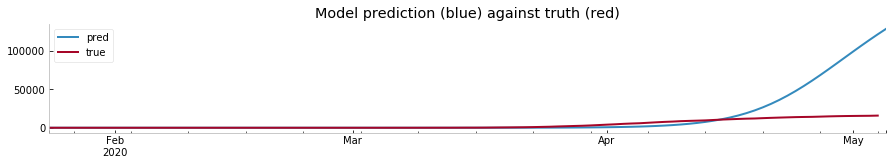

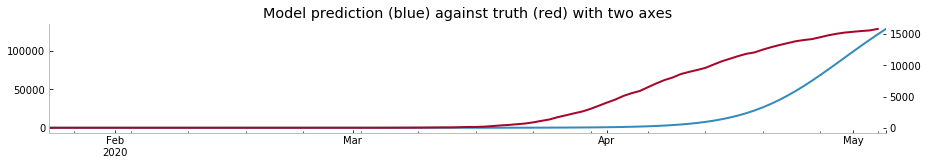

In [23]:
states["D"].iloc[:,0].plot(label = "pred",figsize = (15,2),title = "Model prediction (blue) against truth (red)")
cases_fr["D"].plot(label = "true")
plt.legend()
plt.show()

states["D"].iloc[:,0].plot(figsize = (15,2),title = "Model prediction (blue) against truth (red) with two axes")
cases_fr["D"].plot(secondary_y = True)
plt.show()

Dynamic is interesting but we predict far too many cases

## Naive testing with lockdown

##### Prepare lockdown beta

53


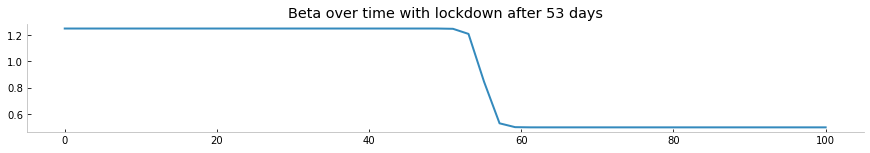

In [24]:
from covid.policies.utils import multiple_sigmoid_response

start_date = cases_fr.index[0]
lockdown_start_date = pd.to_datetime("2020-03-17")
lockdown_start_days = (lockdown_start_date - start_date).days
print(lockdown_start_days)

beta = lambda y,t : multiple_sigmoid_response(t,5/4,[0.5],[lockdown_start_days],4)

t = np.linspace(0,100)
plt.figure(figsize = (15,2))
plt.plot(t,beta(None,t))
plt.title(f"Beta over time with lockdown after {lockdown_start_days} days")
plt.show()

In [25]:
N = 67e6
beta = [3.3/4,[0.52/4],[53]]

national_model = COVID19(N = N,beta = beta)

2020-01-24 00:00:00


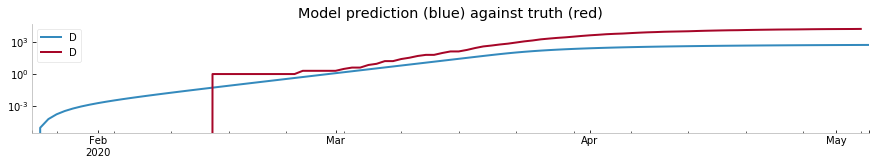

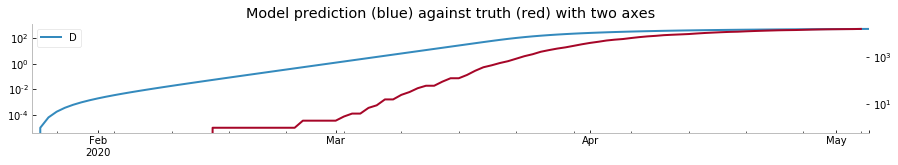

In [26]:
# Start date
start_date = cases_fr.index[0]
print(start_date)

# Two ways of initializing the first state dict
init_state = national_model.make_init_state("S",("E",1))
init_state = {"S":N - 1,"E":1}

# Solving equations to get forecast
states = national_model.solve(init_state,start_date = start_date,n_days = len(cases_fr))
states.head()

states["D"].plot(figsize = (15,2),title = "Model prediction (blue) against truth (red)",logy = True)
cases_fr["D"].plot(logy = True)
plt.legend()
plt.show()

states["D"].plot(figsize = (15,2),title = "Model prediction (blue) against truth (red) with two axes",logy = True)
cases_fr["D"].plot(secondary_y = True,logy = True)
plt.show()

In [27]:
states.query("D >= 1")

S            E          Ia           Im         Is  \
2020-03-01  6.699781e+07   988.346033  257.302369   271.416001  16.600170   
2020-03-02  6.699731e+07  1213.433970  315.901893   333.229845  20.380797   
2020-03-03  6.699670e+07  1489.780575  387.846616   409.120903  25.022410   
2020-03-04  6.699594e+07  1829.057163  476.175411   502.294738  30.721070   
2020-03-05  6.699502e+07  2245.591692  584.618993   616.686701  37.717472   
...                  ...          ...         ...          ...        ...   
2020-05-01  6.684567e+07  1493.655121  975.419406  1028.923424  85.453045   
2020-05-02  6.684541e+07  1394.718298  910.803055   960.762716  79.817748   
2020-05-03  6.684516e+07  1302.335309  850.468220   897.118376  74.551577   
2020-05-04  6.684494e+07  1216.071922  794.131021   837.690951  69.630772   
2020-05-05  6.684472e+07  1135.522691  741.526432   782.200878  65.033033   

                    H         ICU           D              R  
2020-03-01   3.392617    1.789906    1.202861     652.097587  
2020-03-02   4.165278    2.197633    1.477148     800.710002  
2020-03-03   5.113905    2.698213    1.813904     983.168132  
2020-03-04   6.278569    3.312793    2.227356    1207.179783  
2020-03-05   7.708464    4.067336    2.734970    1482.207893  
...               ...         ...         ...            ...  
2020-05-01  25.438806  163.906151  499.053809  150057.023654  
2020-05-02  23.762962  157.784778  502.574343  150560.618091  
2020-05-03  22.196596  151.800954  505.916045  151031.071709  
2020-05-04  20.732711  145.960612  509.087625  151470.567512  
2020-05-05  19.364732  140.268461  512.097399  151881.144579  

[66 rows x 9 columns]

Let's look at the first death cases, we probably have an offset problem between the arbitrary 1 exposed case at the first date <br>
We have an offset of 3 days for the first case, but the second case see an offset of at least 10 days, hence the need to vary this value

In [28]:
print(cases_fr.query("D >= 1").index[0])
print(states.query("D >= 1").index[0])

2020-02-15 00:00:00
2020-03-01 00:00:00


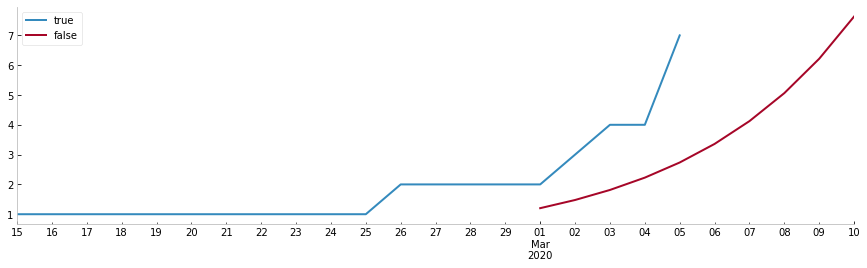

In [29]:
cases_fr.query("D >= 1")["D"].head(20).plot(figsize = (15,4),label = "true")
states.query("D >= 1")["D"].head(10).plot(label = "false")
plt.legend()
plt.show()

## Offsetting the lockdown

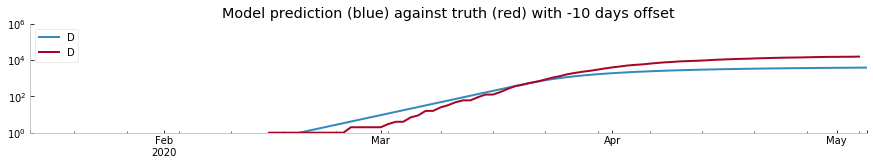

Loss=0.3074818807057503


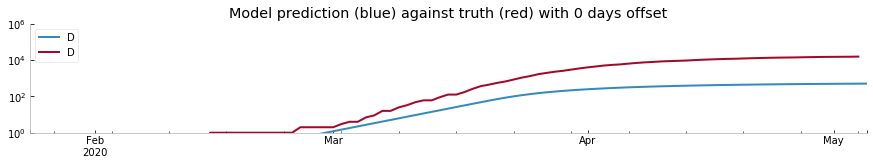

Loss=0.40925871110529927


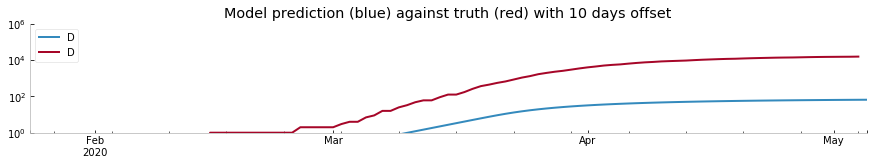

Loss=0.42265150881838437


In [30]:
from covid.policies.utils import multiple_sigmoid_response
from covid.params.metrics import custom_loss

# Constants
N = 67e6

for offset in [-10,0,10]:
    
    beta = [3.3/4,[0.52/4],[53 - offset]]

    # Prepare model
    national_model = COVID19(N = N,beta = beta,offset = offset)

    # Two ways of initializing the first state dict
    init_state = national_model.make_init_state("S",("E",1))
    init_state = {"S":N - 1,"E":1}

    # Solving equations to get forecast
    states = national_model.solve(init_state,start_date = start_date,n_days = len(cases_fr))
    states.head()

    # Plot difference
    states["D"].plot(figsize = (15,2),title = f"Model prediction (blue) against truth (red) with {offset} days offset",logy = True)
    cases_fr["D"].plot(logy = True)
    plt.ylim([1,1e6])
    plt.legend()
    plt.show()
    
    # Display loss
    loss = custom_loss(states.loc[cases_fr.index],cases_fr[["D"]],cols = ["D"])
    print(f"Loss={loss}")

## Using optimizer

##### Init space

In [31]:
space = {
    "beta_low":(0.1,0.6),
    "beta_high":(0.6,2),
    "offset":(-10,10)
}

##### Init model with custom reset function

In [32]:
from covid.policies.utils import multiple_sigmoid_response

class COVID19Model(COVID19):
    
    def __init__(self,params = None):
        if params is not None:
            self.reset(params)
    
    def reset(self,params):
        beta = [params["beta_high"],[params["beta_low"]],[lockdown_start_days - params["offset"]]]

        # Initialize model
        super().__init__(N = N,beta = beta,offset = params["offset"])
        
        
default_params = {'beta_low': 0.2252815231681944, 'beta_high': 1.1195323796585082, 'offset': 4.475977592536238}
national_model = COVID19Model(default_params)

##### Test with one set of params

In [63]:
for offset in [-10,0,10]:
    print(national_model.objective(cases_fr[["D"]],{"beta_low":0.1,"beta_high":0.6,"offset":offset},{"S":N - 1,"E":1}))

0.41973731883917487
0.42101053824878204
0.4213297929248694


In [64]:
for offset in [-10,0,10]:
    print(national_model.objective(cases_fr[["H"]],{"beta_low":0.1,"beta_high":0.6,"offset":offset},{"S":N - 1,"E":1}))

0.5399143233926762
0.5400361000548686
0.5400666441899233


In [65]:
for offset in [-10,0,10]:
    print(national_model.objective(cases_fr[["ICU"]],{"beta_low":0.1,"beta_high":0.6,"offset":offset},{"S":N - 1,"E":1}))

0.4978661401550095
0.4995448504929971
0.4999658021344363


In [66]:
for offset in [-10,0,10]:
    print(national_model.objective(cases_fr[["ICU","D","H"]],{"beta_low":0.1,"beta_high":0.6,"offset":offset},{"S":N - 1,"E":1}))

0.8459063700810616
0.8476048137741267
0.848031000539844


##### Fit model to data

In [138]:
national_model.fit(cases_fr[["D"]],space,{"S":N - 1,"E":1},100,early_stopping = 20)

... Early stopping - best value has not changed since 20 trials at 0.30328997489544607
... Found best solution {'beta_low': 0.21029128945864203, 'beta_high': 0.9677301684673971, 'offset': 1.3073591437887604} for value 0.30328997489544607


##### Compare with real values

We have a nice fit of death cases, but not of confirmed cases, we need to : 
- Fit on several metrics to ensure robustness and avoid overfitting
- Take parameters

In [139]:
pred = national_model.predict(cases_fr[["D"]],{"S":N - 1,"E":1},forecast_days=50)

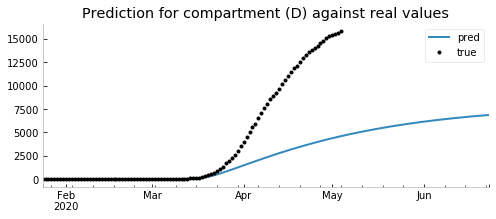

In [140]:
national_model.show_prediction(cases_fr[["D"]],pred = pred)

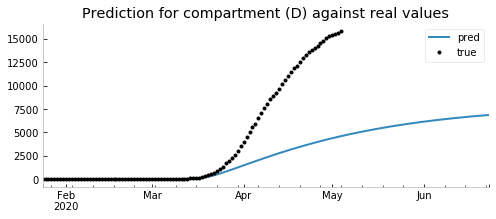

In [141]:
national_model.show_prediction(cases_fr[["D"]],pred = pred,log_y = False)

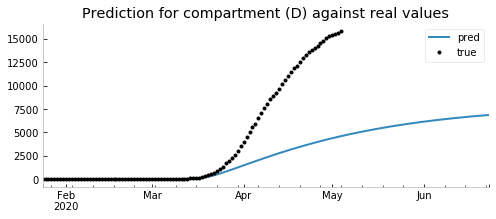

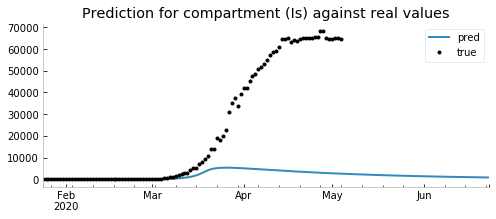

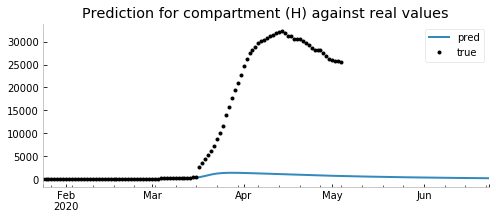

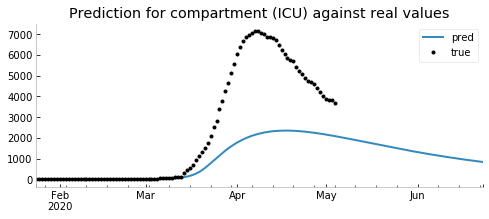

In [142]:
national_model.show_prediction(cases_fr[["D","Is",'H',"ICU"]],pred = pred)

## Estimating distributions

As parameters are estimated using bayesian optimization,<br>
We can use trials as a posterior estimation of those parameters

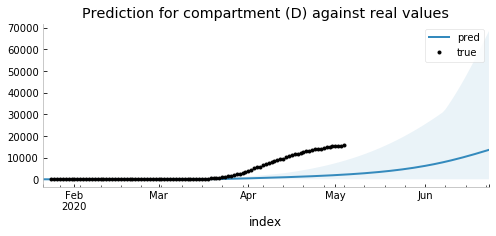

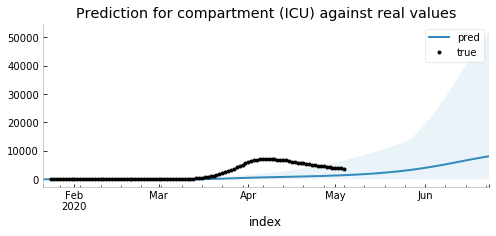

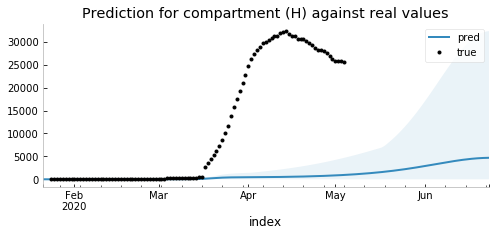

In [144]:
pred = national_model.show_prediction_interval(cases_fr[["ICU","H"]],{"S":N - 1,"E":1},forecast_days=50,n = 10,q = 0.25)

## Using optimizer on more metrics

In [213]:
7/30

0.23333333333333334

In [216]:
class COVID19Model(COVID19):
    
    def __init__(self,params = None):
        if params is not None:
            self.reset(params)
    
    def reset(self,params):
        beta = [params["beta_high"],[params["beta_low"]],[lockdown_start_days - params["offset"]]]

        # Initialize model
        super().__init__(N = N,beta = beta,offset = params["offset"],proba_severe = params["proba_severe"])
        self.params_dict = params

space = {
    "beta_low":(0.01,0.6),
    "beta_high":(0.6,2),
    "offset":(-10,10),
    "proba_severe":(0.01,0.1),
}

national_model = COVID19Model({'beta_low': 0.18239606348530632, 'beta_high': 1.0709586231725032, 'offset': 5.194787596337737, 'proba_severe': 0.06461689154720238})
national_model.fit(cases_fr[["ICU"]],space,{"S":N - 1,"E":1},100,early_stopping = 10)

... Early stopping - best value has not changed since 10 trials at 0.3463017516910815
... Found best solution {'beta_low': 0.3020896294448228, 'beta_high': 0.9317239850216279, 'offset': 8.806969700577255, 'proba_severe': 0.09894671413268165} for value 0.3463017516910815


In [148]:
national_model.opt.show_history()

In [218]:
pd.to_timedelta(10,unit = "d")

Timedelta('10 days 00:00:00')

In [111]:
national_model.opt.show_parallel_coordinates()

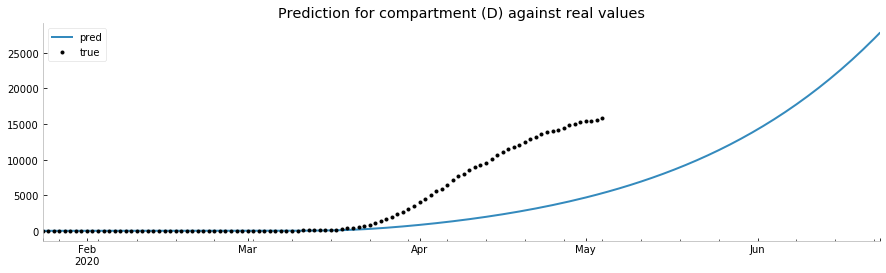

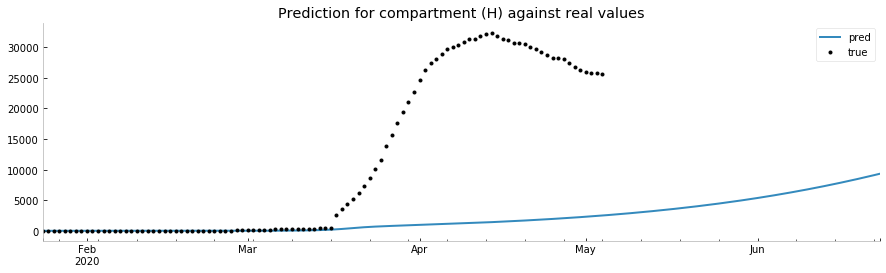

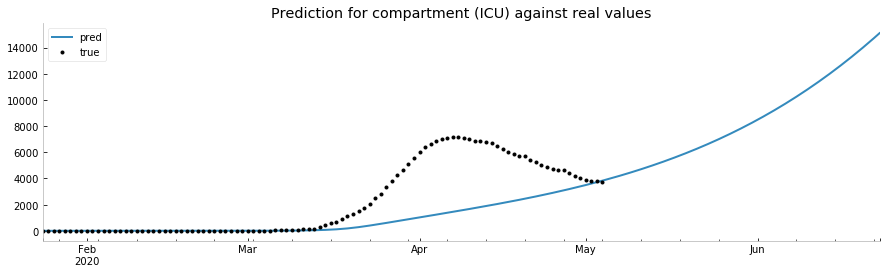

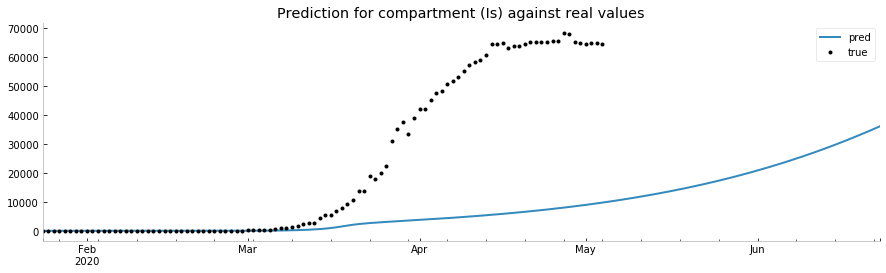

In [217]:
national_model.show_prediction(cases_fr[["D","H","ICU","Is"]],{"S":N - 1,"E":1},forecast_days = 50)

##### Conclusion: 
Not enough, parameters must be improved by default using litterature (eg Pasteur): 
- Too many people in ICU and starting too late p(ICU|Is) too high and duration too high
- Well below number of hospitalization p(H|Is) too low

Maybe also the need for interpolation of base curve

In [52]:
national_model.opt.show_contour(params = ["beta_high","beta_low"])

In [54]:
national_model.opt.show_history()

In [157]:
x = states._melt().assign(facet = lambda x : x["compartment"].map(lambda y : "A" if y not in ["S","R"] else "B"))

In [163]:
d = {"A":["S","R"],"B":["Ia","Im","Is"]}

In [210]:
start_date

Timestamp('2020-01-24 00:00:00', freq='D')

In [176]:
pd.Series(d,name = "compartment").explode().reset_index().rename(columns = {"index":"facet"})

facet compartment
0     A           S
1     A           R
2     B          Ia
3     B          Im
4     B          Is

In [209]:
states.show(group = {"Population":["S","R"],"Infection":["Ia","Im","Is"],"Hospital":["H","ICU","D"]})